# Física Experimental: Erros e Incertezas

`Nomes:`
* Alice Vitória Boschetti
* Felipe Cordeiro Carvalho
* Gabriel Frigo Sena Silva
* Joyce Nunes Alves
* Eduardo Marques dos Santos
* Kimberly Oliveira Germano Ribeiro

## Import

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display import Image

## Dataframe

In [109]:
df = pd.read_excel('./data/measures_data.xlsx')
df.head()

,D1,D2
0,18.50,18.60
1,18.53,18.63
2,19.51,19.51
3,19.40,19.40
4,18.60,18.62


In [110]:
df.shape

(100, 2)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      100 non-null    float64
 1   D2      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Coluna: Desvio absoluto

#### D média

In [112]:
d_media_D1 = ((1/len(df))*(df['D1'].sum()))
d_media_D2 = ((1/len(df))*(df['D2'].sum()))

In [113]:
print(f'D_media_1: {d_media_D1}, D_media_2: {d_media_D2}')

D_media_1: 18.9607, D_media_2: 18.941300000000005


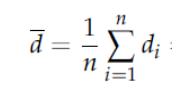

In [114]:
Image(filename='./pictures/d_media.PNG')

#### Calculando a Diferença entre D1 e D2

In [115]:
df['diferenca_D1_D2'] = df['D2'] - df['D1']
df.head()

,D1,D2,diferenca_D1_D2
0,18.50,18.60,0.10
1,18.53,18.63,0.10
2,19.51,19.51,0.00
3,19.40,19.40,0.00
4,18.60,18.62,0.02


#### Calculando Desvio Absoluto D1 e D2

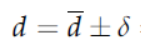

In [116]:
Image(filename='./pictures/desvio_absoluto.PNG')

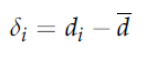

In [117]:
Image(filename='./pictures/variancia.PNG')

In [118]:
df['desvio_absoluto_D1'] = df['D1'] - d_media_D1
df['desvio_absoluto_D2'] = df['D2'] - d_media_D2
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2
0,18.50,18.60,0.10,-0.4607,-0.3413
1,18.53,18.63,0.10,-0.4307,-0.3113
2,19.51,19.51,0.00,0.5493,0.5687
3,19.40,19.40,0.00,0.4393,0.4587
4,18.60,18.62,0.02,-0.3607,-0.3213


#### Calculando a Incerteza do Desvio padrão absoluto

* Colocar a coluna de desvio padrão em módulo para ficar positiva e somar com o método `abs()`

In [119]:
df['desvio_absoluto_D1_modulo'] = df['desvio_absoluto_D1'].abs()
df['desvio_absoluto_D2_modulo'] = df['desvio_absoluto_D2'].abs()
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,desvio_absoluto_D1_modulo,desvio_absoluto_D2_modulo
0,18.50,18.60,0.10,-0.4607,-0.3413,0.4607,0.3413
1,18.53,18.63,0.10,-0.4307,-0.3113,0.4307,0.3113
2,19.51,19.51,0.00,0.5493,0.5687,0.5493,0.5687
3,19.40,19.40,0.00,0.4393,0.4587,0.4393,0.4587
4,18.60,18.62,0.02,-0.3607,-0.3213,0.3607,0.3213


* Calculando a incerteza absoluta:

In [120]:
incerteza_D1 = (1/len(df))*df['desvio_absoluto_D1_modulo'].sum()
incerteza_D2 = (1/len(df))*df['desvio_absoluto_D2_modulo'].sum()
print(f'Incerteza D1: {incerteza_D1}\nIncerteza D2: {incerteza_D2}')

Incerteza D1: 0.48551400000000017
Incerteza D2: 0.4694560000000007


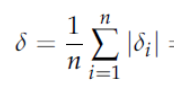

In [121]:
Image(filename='./pictures/incerteza_1.PNG')

* `RESPOSTA:`

In [122]:
print(f'Primeira medida: {round(d_media_D1,4)} +- {round(incerteza_D1,4)}\nSegunda medida: {round(d_media_D2,4)} +- {round(incerteza_D2,4)}')

Primeira medida: 18.9607 +- 0.4855
Segunda medida: 18.9413 +- 0.4695


* Dropando colunas do modulo (desnecessária):

In [123]:
df = df.drop(columns=['desvio_absoluto_D1_modulo', 'desvio_absoluto_D2_modulo'], axis=1)
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2
0,18.50,18.60,0.10,-0.4607,-0.3413
1,18.53,18.63,0.10,-0.4307,-0.3113
2,19.51,19.51,0.00,0.5493,0.5687
3,19.40,19.40,0.00,0.4393,0.4587
4,18.60,18.62,0.02,-0.3607,-0.3213


## Coluna: Desvio Médio

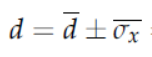

In [124]:
Image(filename='./pictures/desvio_medio.PNG')

#### Calculo do desvio médio:

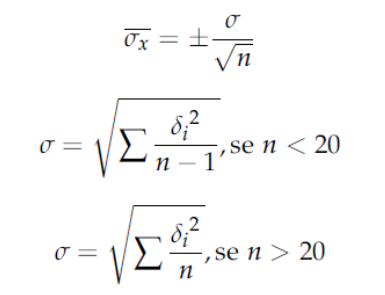

In [125]:
Image(filename='./pictures/desvio.PNG')

* Elevar ao quadrado;
* Aqui os números negativos ficam positivos, isto é necessário para a fórmula por conta da raiz.

In [126]:
df['desvio_absoluto_D1_quadrado'] = df['desvio_absoluto_D1']**2
df['desvio_absoluto_D2_quadrado'] = df['desvio_absoluto_D2']**2
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,desvio_absoluto_D1_quadrado,desvio_absoluto_D2_quadrado
0,18.50,18.60,0.10,-0.4607,-0.3413,0.212244,0.116486
1,18.53,18.63,0.10,-0.4307,-0.3113,0.185502,0.096908
2,19.51,19.51,0.00,0.5493,0.5687,0.301730,0.323420
3,19.40,19.40,0.00,0.4393,0.4587,0.192984,0.210406
4,18.60,18.62,0.02,-0.3607,-0.3213,0.130104,0.103234


* Dividir pelo tamanho do df (100), já que temos mais de 20 linhas.

In [127]:
df['desvio_absoluto_D1_quadrado'] = df['desvio_absoluto_D1_quadrado']/(len(df))
df['desvio_absoluto_D2_quadrado'] = df['desvio_absoluto_D2_quadrado']/(len(df))
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,desvio_absoluto_D1_quadrado,desvio_absoluto_D2_quadrado
0,18.50,18.60,0.10,-0.4607,-0.3413,0.002122,0.001165
1,18.53,18.63,0.10,-0.4307,-0.3113,0.001855,0.000969
2,19.51,19.51,0.00,0.5493,0.5687,0.003017,0.003234
3,19.40,19.40,0.00,0.4393,0.4587,0.001930,0.002104
4,18.60,18.62,0.02,-0.3607,-0.3213,0.001301,0.001032


* Raiz quadrada da soma:

In [128]:
desvio_medio_D1 = math.sqrt(df['desvio_absoluto_D1_quadrado'].sum())
desvio_medio_D2 = math.sqrt(df['desvio_absoluto_D2_quadrado'].sum())

print(f'Desvio Médio D1: {desvio_medio_D1}\nDesvio Médio D2: {desvio_medio_D2}')

Desvio Médio D1: 0.5645020017679301
Desvio Médio D2: 0.5600886626240528


#### Cálculo desvio linha:

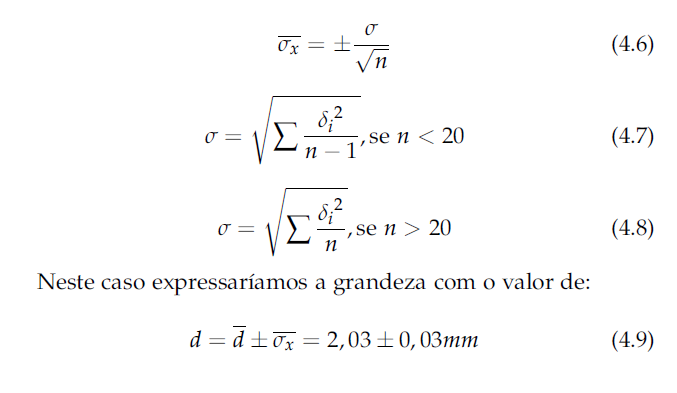

In [129]:
Image(filename='./pictures/desv_med_1.PNG')

`RESPOSTA:`

In [130]:
desvio_linha_D1 = (desvio_medio_D1/(math.sqrt(len(df))))
desvio_linha_D2 = (desvio_medio_D2/(math.sqrt(len(df))))
print(f'Desvio linha D1: {desvio_linha_D1}\nDesvio linha D1: {desvio_linha_D2}')

Desvio linha D1: 0.05645020017679301
Desvio linha D1: 0.056008866262405275


* Dropando colunas desvio_absoluto_dx_quadrado (desnecessárias).

In [131]:
df = df.drop(columns=['desvio_absoluto_D1_quadrado', 'desvio_absoluto_D2_quadrado'])
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2
0,18.50,18.60,0.10,-0.4607,-0.3413
1,18.53,18.63,0.10,-0.4307,-0.3113
2,19.51,19.51,0.00,0.5493,0.5687
3,19.40,19.40,0.00,0.4393,0.4587
4,18.60,18.62,0.02,-0.3607,-0.3213


## Volume

#### Cálculo do Volume

`Fórmula:` V = 4/3 π r³: 

* V = volume;
* r = raio.

In [132]:
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2
0,18.50,18.60,0.10,-0.4607,-0.3413
1,18.53,18.63,0.10,-0.4307,-0.3113
2,19.51,19.51,0.00,0.5493,0.5687
3,19.40,19.40,0.00,0.4393,0.4587
4,18.60,18.62,0.02,-0.3607,-0.3213


In [133]:
df['volume_V1'] = ((4/3)*math.pi)*((df['D1']/2)**3)
df['volume_V2'] = ((4/3)*math.pi)*((df['D2']/2)**3)
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068


#### Cálculo diferença entre volume D1 e D2

In [134]:
df['diferença_V1_V2'] = df['volume_V2']-df['volume_V1']
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345


#### Volume "v" Media

In [137]:
v_media_D1 = ((1/len(df))*(df['volume_V1'].sum()))
v_media_D2 = ((1/len(df))*(df['volume_V2'].sum()))

In [138]:
print(f'V_media_1: {v_media_D1}, V_media_2: {v_media_D2}')

V_media_1: 3578.621395673363, V_media_2: 3567.5250897254737


#### Volume desvio absoluto

In [139]:
df['desvio_absoluto_V1'] = df['volume_V1'] - v_media_D1
df['desvio_absoluto_V2'] = df['volume_V2'] - v_media_D2
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022


#### Calculando Incerteza dos Volumes

* Colocar a coluna de desvio padrão em módulo para ficar positiva e somar com o método `abs()`

In [141]:
df['desvio_absoluto_V1_modulo'] = df['desvio_absoluto_V1'].abs()
df['desvio_absoluto_V2_modulo'] = df['desvio_absoluto_V2'].abs()
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2,desvio_absoluto_V1_modulo,desvio_absoluto_V2_modulo
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367,263.390298,198.242367
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077,247.235979,181.913077
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398,309.774092,320.870398
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633,244.374327,255.470633
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022,209.338673,187.362022


* Calculando a incerteza absoluta:

In [142]:
incerteza_V1 = (1/len(df))*df['desvio_absoluto_V1_modulo'].sum()
incerteza_V2 = (1/len(df))*df['desvio_absoluto_V2_modulo'].sum()
print(f'Incerteza D1: {incerteza_V1}\nIncerteza D2: {incerteza_V2}')

Incerteza D1: 274.7998246720944
Incerteza D2: 266.5823596345082


`RESPOSTA:`

In [143]:
print(f'Primeira medida: {round(v_media_D1,4)} +- {round(incerteza_V1,4)}\nSegunda medida: {round(v_media_D2,4)} +- {round(incerteza_V2,4)}')

Primeira medida: 3578.6214 +- 274.7998
Segunda medida: 3567.5251 +- 266.5824


* Dropando colunas do modulo (desnecessárias):

In [144]:
df = df.drop(columns=['desvio_absoluto_V1_modulo', 'desvio_absoluto_V2_modulo'], axis=1)
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022


#### Volume desvio médio

In [145]:
df['desvio_absoluto_V1_quadrado'] = df['desvio_absoluto_V1']**2
df['desvio_absoluto_V2_quadrado'] = df['desvio_absoluto_V2']**2
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2,desvio_absoluto_V1_quadrado,desvio_absoluto_V2_quadrado
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367,69374.449147,39300.036063
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077,61125.629285,33092.367507
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398,95959.988167,102957.812376
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633,59718.811648,65265.244248
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022,43822.679981,35104.527332


In [146]:
df['desvio_absoluto_V1_quadrado'] = df['desvio_absoluto_V1_quadrado']/(len(df))
df['desvio_absoluto_V2_quadrado'] = df['desvio_absoluto_V2_quadrado']/(len(df))
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2,desvio_absoluto_V1_quadrado,desvio_absoluto_V2_quadrado
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367,693.744491,393.000361
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077,611.256293,330.923675
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398,959.599882,1029.578124
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633,597.188116,652.652442
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022,438.226800,351.045273


* Calculando raiz da soma:

In [148]:
desvio_medio_V1 = math.sqrt(df['desvio_absoluto_V1_quadrado'].sum())
desvio_medio_V2 = math.sqrt(df['desvio_absoluto_V2_quadrado'].sum())

print(f'Desvio Médio V1: {desvio_medio_V1}\nDesvio Médio V2: {desvio_medio_V2}')

Desvio Médio V1: 319.7061426576012
Desvio Médio V2: 317.2353348188203


#### Cálculo desvio linha:

In [149]:
desvio_linha_V1 = (desvio_medio_V1/(math.sqrt(len(df))))
desvio_linha_V2 = (desvio_medio_V2/(math.sqrt(len(df))))
print(f'Desvio linha D1: {desvio_linha_V1}\nDesvio linha D1: {desvio_linha_V2}')

Desvio linha D1: 31.970614265760123
Desvio linha D1: 31.723533481882033


* Removendo colunas desvio_absoluto_Vx_quadrado (desnecessária):

In [150]:
df = df.drop(columns=['desvio_absoluto_V1_quadrado', 'desvio_absoluto_V2_quadrado'])
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022


## Salvando Dataframe

In [151]:
df.to_csv('./data/df.csv')